In [ ]:
import requests

url = 'https://collectionapi.metmuseum.org/public/collection/v1/search?hasImages=true&medium=Paintings&q=full-length portrait'

# get the content at the requested url
response = requests.get(url)

# get the JSON data in the response object
data = response.json()

In [ ]:
len(data['objectIDs'])

123

In [ ]:
example_ids = data['objectIDs'][:10]

In [ ]:
def reqObject(id):
  return requests.get('https://collectionapi.metmuseum.org/public/collection/v1/objects/' + str(id)).json()

In [ ]:
from PIL import Image
from urllib import request
from io import BytesIO
import matplotlib.pyplot as plt

def loadImage(url):
  res = request.urlopen(url).read()
  Sample_Image = Image.open(BytesIO(res))
  return Sample_Image
  # plt.imshow(Sample_Image)


In [ ]:
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = loadImage(obj['primaryImage'])
    plt.figure()
    plt.imshow(image)

KeyboardInterrupt: ignored

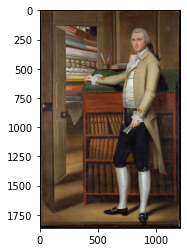

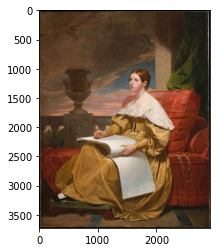

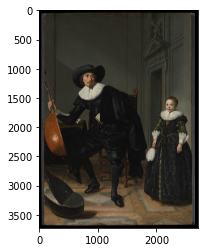

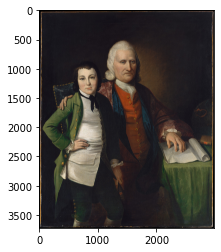

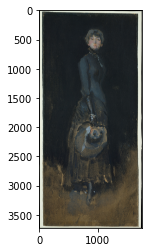

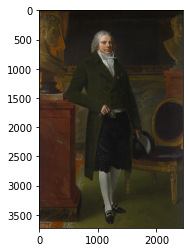

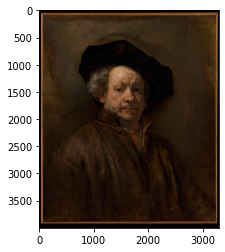

In [ ]:
for id in data['objectIDs'][:10]:
  obj = reqObject(id)
  process(obj)

In [ ]:
all_data = []
for id in data['objectIDs']:
  obj = reqObject(id)
  all_data.append({key:obj[key] for key in ['objectID', 'title', 'objectDate', 'primaryImageSmall', 'artistDisplayName']})

In [ ]:
all_data

[{'artistDisplayName': 'Ralph Earl',
  'objectDate': '1789',
  'objectID': 10830,
  'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ad/web-large/DT60.jpg',
  'title': 'Elijah Boardman'},
 {'artistDisplayName': 'Samuel F. B. Morse',
  'objectDate': 'ca. 1836–37',
  'objectID': 11605,
  'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ad/web-large/DT69.jpg',
  'title': 'Susan Walker Morse (The Muse)'},
 {'artistDisplayName': 'Thomas de Keyser',
  'objectDate': '1629',
  'objectID': 436818,
  'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/DP145937.jpg',
  'title': 'A Musician and His Daughter'},
 {'artistDisplayName': 'Matthew Pratt',
  'objectDate': 'ca. 1772',
  'objectID': 11798,
  'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ad/web-large/DT2062.jpg',
  'title': 'Cadwallader Colden and His Grandson Warren De Lancey'},
 {'artistDisplayName': 'James McNeill Whistler',
  'objectDate': 'ca. 1883',
  'objectID': 13245,
  'p

In [ ]:
for i in all_data:
  response = requests.get(i['primaryImageSmall'])
  file = open("images/" + str(i['objectID']) + ".jpg", "wb")
  file.write(response.content)
  file.close()


In [ ]:
!zip -r /content/images.zip /content/images
from google.colab import files
files.download("/content/images.zip")

  adding: content/images/ (stored 0%)
  adding: content/images/435700.jpg (deflated 0%)
  adding: content/images/.ipynb_checkpoints/ (stored 0%)
  adding: content/images/10475.jpg (deflated 0%)
  adding: content/images/436433.jpg (deflated 0%)
  adding: content/images/437640.jpg (deflated 23%)
  adding: content/images/436984.jpg (deflated 0%)
  adding: content/images/436668.jpg (deflated 2%)
  adding: content/images/437498.jpg (deflated 0%)
  adding: content/images/437229.jpg (deflated 0%)
  adding: content/images/11798.jpg (deflated 0%)
  adding: content/images/436438.jpg (deflated 18%)
  adding: content/images/436955.jpg (deflated 0%)
  adding: content/images/436284.jpg (deflated 1%)
  adding: content/images/437494.jpg (deflated 1%)
  adding: content/images/438378.jpg (deflated 0%)
  adding: content/images/436964.jpg (deflated 19%)
  adding: content/images/437056.jpg (deflated 0%)
  adding: content/images/10830.jpg (deflated 0%)
  adding: content/images/436256.jpg (deflated 0%)
  add

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json

with open('/content/alphapose-results.json') as json_file:
    alphapose = json.load(json_file)

In [ ]:
alphapose

[{'box': [210.30299377441406,
   221.1927490234375,
   169.64463806152344,
   227.0184326171875],
  'category_id': 1,
  'idx': [0.0],
  'image_id': '10525.jpg',
  'keypoints': [331.7054138183594,
   284.8199768066406,
   0.9021058082580566,
   336.1393737792969,
   264.8671875,
   0.9605215787887573,
   302.8847351074219,
   267.08416748046875,
   0.9110660552978516,
   345.0072937011719,
   271.51812744140625,
   0.5794036388397217,
   245.2433319091797,
   287.0369567871094,
   0.5979828238487244,
   371.6109924316406,
   411.1876525878906,
   0.38914740085601807,
   203.1207733154297,
   406.75372314453125,
   0.24272964894771576,
   397.1062316894531,
   472.154541015625,
   0.08710429817438126,
   188.71041870117188,
   467.7205810546875,
   0.03645872324705124,
   397.1062316894531,
   467.7205810546875,
   0.04791068658232689,
   329.4884338378906,
   462.1781311035156,
   0.027856310829520226,
   318.403564453125,
   393.45184326171875,
   0.024224702268838882,
   262.979156494

In [ ]:
#create new json file consisting of alphapose + data from met
int(alphapose[0]['image_id'].split('.')[0])

10525

In [ ]:
for i in alphapose:
  id = int(i['image_id'].split('.')[0])
  # i.append(all_data[])
  for item in all_data:
    if id == item['objectID']:
      i.update(item)

In [ ]:
with open('posed_paintings.json', 'w') as outfile:
    json.dump(alphapose, outfile)

In [ ]:
len(alphapose)

192